# **Pemahaman Dataset**

## Sumber Dataset
Dataset ini berisi informasi mengenai data gaji berdasarkan berbagai faktor seperti umur, jenis kelamin, tingkat pendidikan, jabatan pekerjaan, dan pengalaman kerja. Dataset ini dapat digunakan untuk membangun model prediksi gaji dengan menggunakan fitur-fitur yang tersedia.

Sumber: [Salary Data](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data?select=Salary_Data.csv)

## Deskripsi Kolom
Dataset ini memiliki 6 kolom sebagai berikut:

1. **Age** (Umur): Umur individu dalam tahun. Ini adalah fitur numerik yang menunjukkan usia karyawan.
2. **Gender** (Jenis Kelamin): Jenis kelamin individu (Male/Female). Ini adalah fitur kategorikal yang menunjukkan jenis kelamin.
3. **Education Level** (Tingkat Pendidikan): Tingkat pendidikan individu (misalnya, Bachelor's, Master's, PhD). Ini adalah fitur kategorikal yang menunjukkan tingkat pendidikan.
4. **Job Title** (Jabatan Pekerjaan): Jabatan atau posisi pekerjaan individu dalam organisasi (misalnya, Software Engineer, Data Analyst, Director). Ini adalah fitur kategorikal yang menunjukkan jabatan kerja.
5. **Years of Experience** (Tahun Pengalaman): Lama pengalaman kerja individu dalam tahun. Ini adalah fitur numerik yang menunjukkan jumlah tahun pengalaman.
6. **Salary** (Gaji): Gaji individu dalam unit yang sesuai (misalnya, dalam ribuan atau juta). Ini adalah variabel target yang ingin diprediksi.

## Tujuan Analisis
Tujuan dari analisis ini adalah untuk membangun model prediksi gaji berdasarkan fitur-fitur yang tersedia. Model regresi linear dan polinomial akan digunakan untuk menganalisis hubungan antara variabel independen (fitur) dan variabel dependen (gaji). Evaluasi model akan dilakukan dengan menggunakan metrik seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), dan R² score.

## Langkah-Langkah
1. **Pemahaman Dataset:** Menjelaskan variabel dan sumber data yang digunakan.
2. **Eksplorasi dan Pra-pemrosesan Data:** Menangani missing values dan melakukan analisis korelasi.
3. **Implementasi Model:** Membangun model regresi linear dan polinomial.
4. **Evaluasi Model:** Menggunakan metrik evaluasi dan membandingkan performa kedua model.
5. **Analisis Hasil:** Menginterpretasikan hasil model dan menyimpulkan kinerja model.

Dataset ini akan digunakan untuk mengembangkan pemahaman dalam prediksi gaji berdasarkan berbagai fitur yang tersedia.

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Set warna dan style untuk visualisasi
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

## Loading Dataset

Pada bagian ini, kita akan memuat dataset gaji karyawan yang berisi informasi tentang usia, jenis kelamin, tingkat pendidikan, jabatan, pengalaman kerja, dan gaji bulanan karyawan.

In [ ]:
# Memuat dataset dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ganti path sesuai lokasi file di Drive Anda
file_path = '/content/drive/MyDrive/Salary_Data.csv'
df = pd.read_csv(file_path)

# Melihat 5 data pertama
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# **Exploratory Data Analysis (EDA)**

Pada bagian ini, kita akan melakukan eksplorasi data untuk memahami karakteristik dataset yang kita miliki. EDA akan membantu kita menemukan insight penting dan mempersiapkan data untuk pemodelan.

In [ ]:
# Melihat informasi umum dataset
print("Informasi Dataset:")
df.info()

# Memeriksa nilai yang hilang
print("\nNilai yang hilang pada setiap kolom:")
print(df.isnull().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB

Nilai yang hilang pada setiap kolom:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [ ]:
# Statistik deskriptif untuk kolom numerik
print("Statistik deskriptif untuk kolom numerik:")
df.describe()

Statistik deskriptif untuk kolom numerik:


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:
# Cek Nilai Unik di Semua Kolom Kategorikal
for col in df.select_dtypes(include='object').columns:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-" * 30)

Kolom: Gender
['Male' 'Female' nan 'Other']
------------------------------
Kolom: Education Level
["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
------------------------------
Kolom: Job Title
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Ne

<ipython-input-6-f8951452e781>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_counts.index, y=edu_counts.values, ax=axes[1, 1], palette=palette)
<ipython-input-6-f8951452e781>:23: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x=edu_counts.index, y=edu_counts.values, ax=axes[1, 1], palette=palette)
<ipython-input-6-f8951452e781>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
<ipython-input-6-f8951452e781>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(

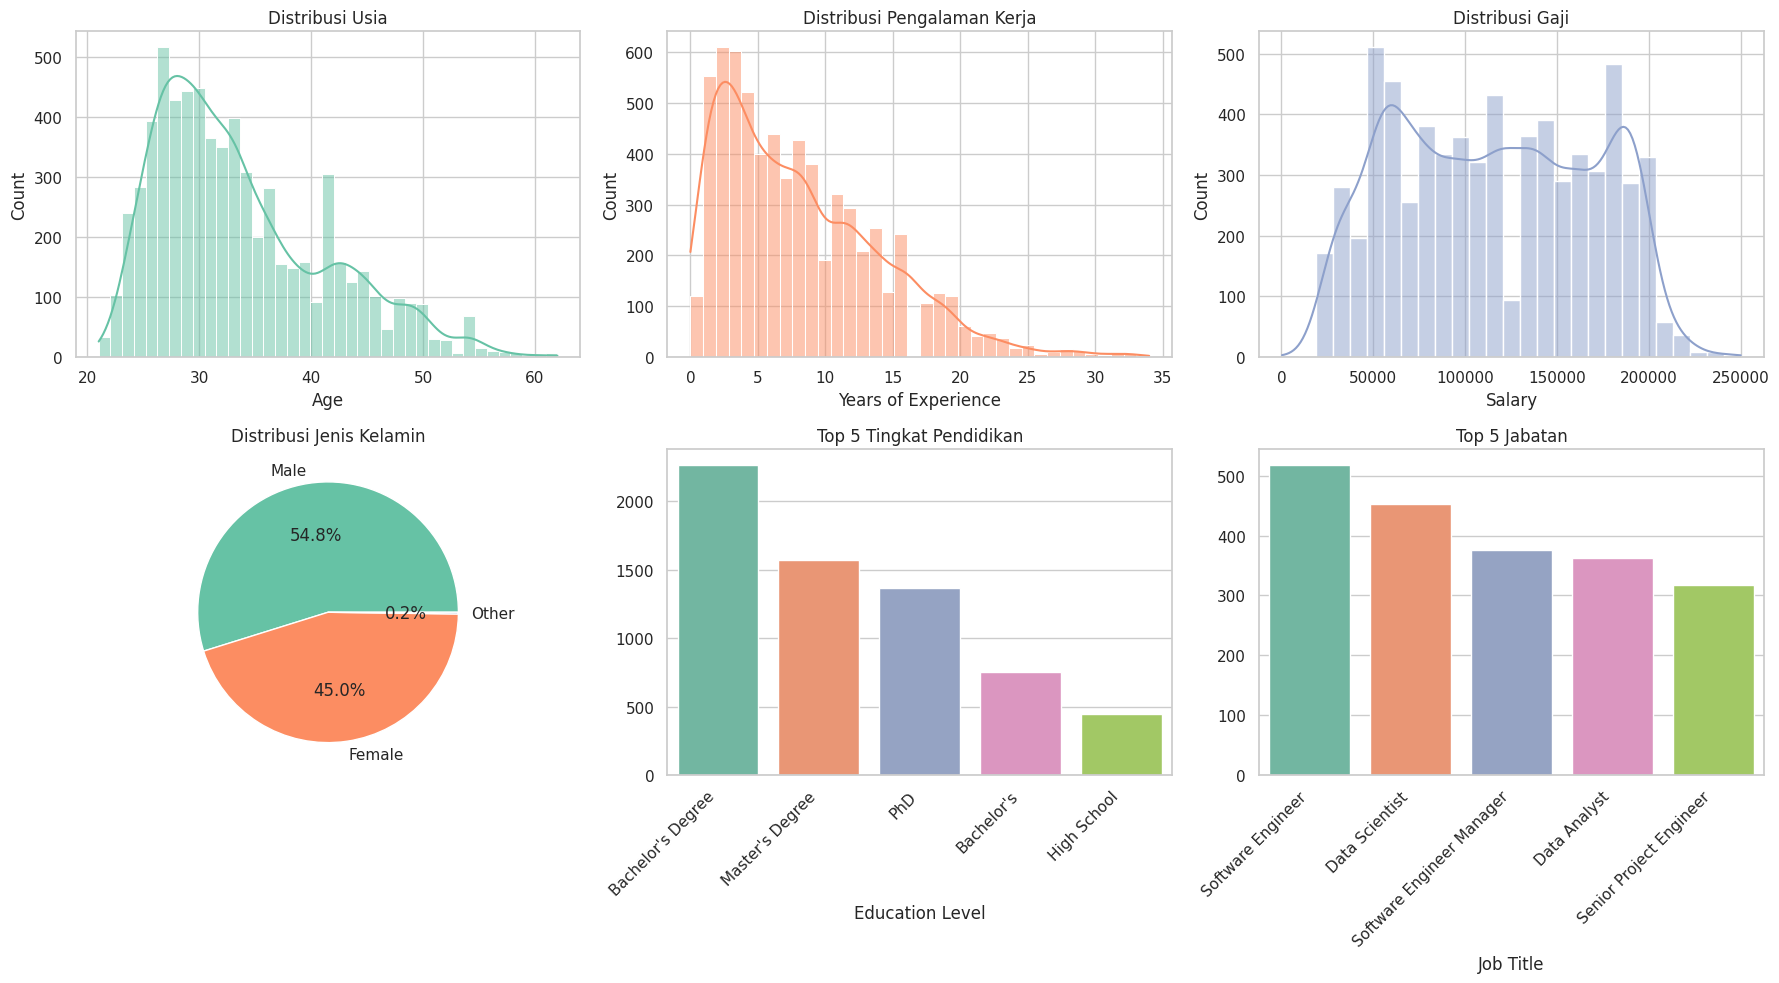

In [ ]:
# Visualisasi distribusi untuk kolom-kolom utama dalam satu plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Distribusi Usia
sns.histplot(df['Age'], kde=True, ax=axes[0, 0], color=palette[0])
axes[0, 0].set_title('Distribusi Usia')

# Distribusi Pengalaman Kerja
sns.histplot(df['Years of Experience'], kde=True, ax=axes[0, 1], color=palette[1])
axes[0, 1].set_title('Distribusi Pengalaman Kerja')

# Distribusi Gaji
sns.histplot(df['Salary'], kde=True, ax=axes[0, 2], color=palette[2])
axes[0, 2].set_title('Distribusi Gaji')

# Distribusi Jenis Kelamin
gender_counts = df['Gender'].value_counts()
axes[1, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=palette)
axes[1, 0].set_title('Distribusi Jenis Kelamin')

# Distribusi Tingkat Pendidikan (Top 5)
edu_counts = df['Education Level'].value_counts().head(5)
sns.barplot(x=edu_counts.index, y=edu_counts.values, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Top 5 Tingkat Pendidikan')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

# Distribusi Jabatan (Top 5)
job_counts = df['Job Title'].value_counts().head(5)
sns.barplot(x=job_counts.index, y=job_counts.values, ax=axes[1, 2], palette=palette)
axes[1, 2].set_title('Top 5 Jabatan')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-7-126414566483>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Salary'], ax=axes[0, 2], palette=palette)
<ipython-input-7-126414566483>:15: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(x=df['Gender'], y=df['Salary'], ax=axes[0, 2], palette=palette)
<ipython-input-7-126414566483>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Education Level'], y=df['Salary'], ax=axes[1, 0], palette=palette)
<ipython-input-7-126414566483>:19: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df['Education 

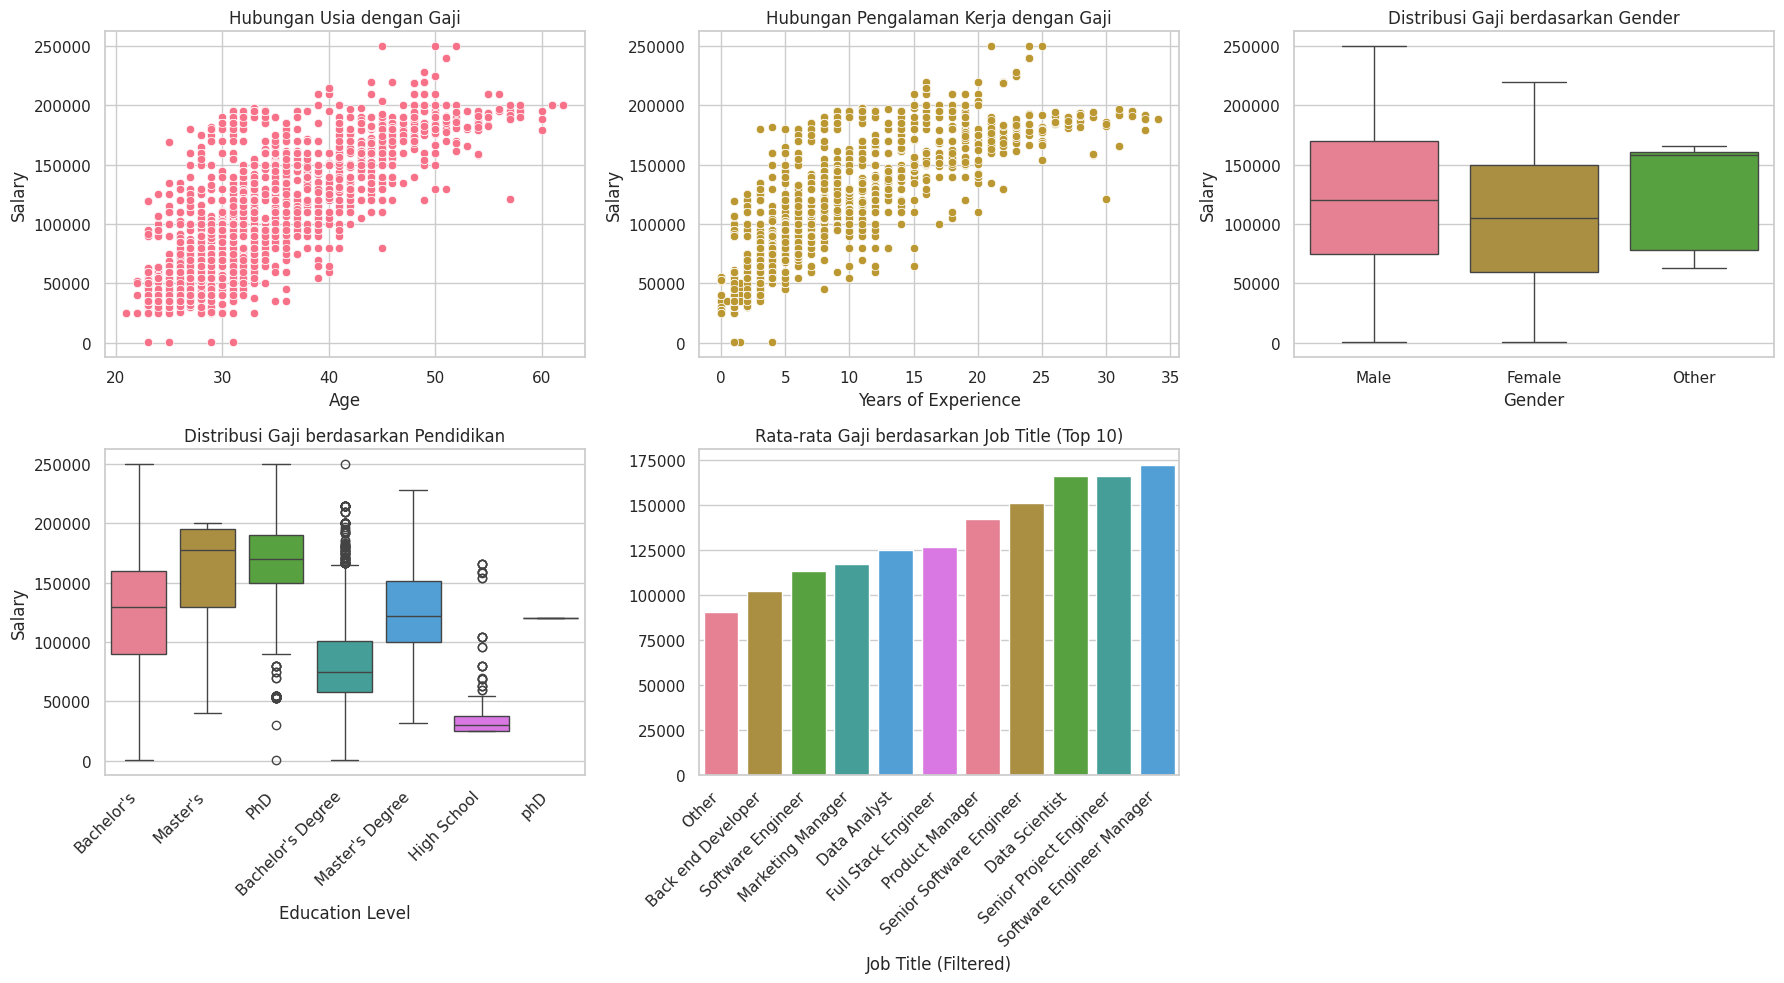

In [ ]:

# Warna palet
palette = sns.color_palette("husl", 6)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Usia vs Salary
sns.scatterplot(x=df['Age'], y=df['Salary'], ax=axes[0, 0], color=palette[0])
axes[0, 0].set_title('Hubungan Usia dengan Gaji')

# Pengalaman vs Salary
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'], ax=axes[0, 1], color=palette[1])
axes[0, 1].set_title('Hubungan Pengalaman Kerja dengan Gaji')

# Gender vs Salary
sns.boxplot(x=df['Gender'], y=df['Salary'], ax=axes[0, 2], palette=palette)
axes[0, 2].set_title('Distribusi Gaji berdasarkan Gender')

# Pendidikan vs Salary
sns.boxplot(x=df['Education Level'], y=df['Salary'], ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Distribusi Gaji berdasarkan Pendidikan')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# Job Title dengan banyak kategori - Ambil Top 10
top_jobs = df['Job Title'].value_counts().nlargest(10).index
df['Job Title (Filtered)'] = df['Job Title'].apply(lambda x: x if x in top_jobs else 'Other')

# Rata-rata gaji berdasarkan Job Title (Filtered)
job_salary_avg = df.groupby('Job Title (Filtered)')['Salary'].mean().sort_values()
sns.barplot(x=job_salary_avg.index, y=job_salary_avg.values, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Rata-rata Gaji berdasarkan Job Title (Top 10)')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

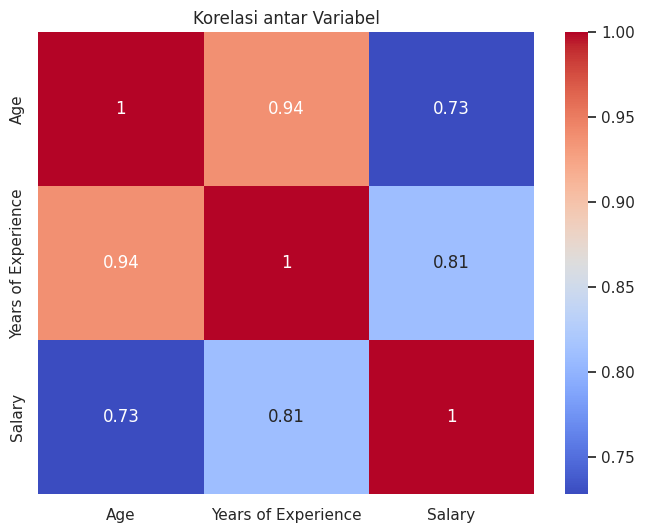

In [ ]:
# Korelasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Years of Experience', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Variabel')
plt.show()

# **Preprocessing Data**

Berdasarkan hasil EDA sebelumnya, kita akan melakukan preprocessing pada dataset untuk mempersiapkannya untuk pemodelan. Hal-hal yang perlu diperhatikan:

1. Terdapat nilai yang hilang (missing values) pada beberapa kolom
2. Terdapat inconsistensi dalam penulisan beberapa nilai (contoh: 'PhD' dan 'phD')

Mari kita lakukan preprocessing step by step.

### 1. Menangani Nilai yang Hilang
Karena jumlah nilai yang hilang relatif sedikit, kita akan menghapus nilai yang hilang (missing values) karena jumlahnya relatif sedikit.

In [ ]:
# Menghapus baris dengan nilai yang hilang
df = df.dropna()

# Memeriksa nilai yang hilang setelah penghapusan
print("Nilai yang hilang setelah penghapusan:")
print(df.isnull().sum())

Nilai yang hilang setelah penghapusan:
Age                     0
Gender                  0
Education Level         0
Job Title               0
Years of Experience     0
Salary                  0
Job Title (Filtered)    0
dtype: int64


### 2. Standardisasi Nilai Kategorikal

Setelah mengatasi nilai yang hilang, kita perlu memperbaiki inkonsistensi pada data kategorikal.

In [ ]:
print("\nNilai unik pada kolom Education Level:")
print(df['Education Level'].unique())


Nilai unik pada kolom Education Level:
["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']


In [ ]:
# Standardisasi Education Level
education_mapping = {
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree",
    "phD": "PhD"
}

df['Education Level'] = df['Education Level'].replace(education_mapping)

# Memeriksa hasil standardisasi
print("\nSetelah standardisasi Education Level:")
print(df['Education Level'].unique())


Setelah standardisasi Education Level:
["Bachelor's Degree" "Master's Degree" 'PhD' 'High School']


<ipython-input-11-8558829ed355>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].replace(education_mapping)


In [ ]:
# Membuat dataset hanya dengan 3 fitur yang diminta
model_df = df[['Years of Experience', 'Education Level', 'Job Title', 'Salary']]

# Menampilkan dataset setelah persiapan
model_df.head()

,Years of Experience,Education Level,Job Title,Salary
0,5.0,Bachelor's Degree,Software Engineer,90000.0
1,3.0,Master's Degree,Data Analyst,65000.0
2,15.0,PhD,Senior Manager,150000.0
3,7.0,Bachelor's Degree,Sales Associate,60000.0
4,20.0,Master's Degree,Director,200000.0


## Persiapan Data untuk Pemodelan

Kita akan memisahkan fitur dan target, serta melakukan one-hot encoding untuk fitur kategorikal.

In [ ]:
# Memisahkan fitur dan target
X = model_df.drop('Salary', axis=1)
y = model_df['Salary']

# Mendefinisikan kolom numerik dan kategorikal
numerical_cols = ['Years of Experience']
categorical_cols = ['Education Level', 'Job Title']

print("Kolom kategorikal:", categorical_cols)
print("Kolom numerik:", numerical_cols)

Kolom kategorikal: ['Education Level', 'Job Title']
Kolom numerik: ['Years of Experience']


In [ ]:
# Membuat preprocessor dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nUkuran data setelah splitting:")
print(f"Training set: {X_train.shape} sampel")
print(f"Test set: {X_test.shape} sampel")


Ukuran data setelah splitting:
Training set: (5358, 3) sampel
Test set: (1340, 3) sampel


# **Implementasi Model**

## Pemodelan dengan Linear Regression

Kita akan membangun pipeline untuk preprocessing dan linear regression.

In [ ]:
# Linear Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Training Linear Regression
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

## Pemodelan dengan Polynomial Regression

Kita akan mencoba beberapa derajat polynomial untuk menemukan model terbaik.

In [ ]:
# Polynomial Regression Pipelines
poly_degrees = [2, 3]
poly_predictions = {}

for degree in poly_degrees:
    poly_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('regressor', LinearRegression())
    ])

    # Training Polynomial Regression
    poly_pipeline.fit(X_train, y_train)
    poly_predictions[degree] = poly_pipeline.predict(X_test)

# **Evaluasi Model**

## Evaluasi Linear Regression

In [ ]:
# Evaluasi Linear Regression
lr_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'R2': r2_score(y_test, y_pred_lr)
}

print("Linear Regression Performance:")
for metric, value in lr_metrics.items():
    print(f"{metric}: {value:.2f}")

Linear Regression Performance:
MAE: 15487.83
MSE: 458246826.30
RMSE: 21406.70
R2: 0.84


## Evaluasi Polynomial Regression

In [ ]:
# Evaluasi Polynomial Regression
poly_results = {}

for degree, y_pred_poly in poly_predictions.items():
    poly_results[degree] = {
        'MAE': mean_absolute_error(y_test, y_pred_poly),
        'MSE': mean_squared_error(y_test, y_pred_poly),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        'R2': r2_score(y_test, y_pred_poly)
    }

    print(f"\nPolynomial Regression (Degree {degree}) Performance:")
    for metric, value in poly_results[degree].items():
        print(f"{metric}: {value:.2f}")


Polynomial Regression (Degree 2) Performance:
MAE: 10155.95
MSE: 247653840.17
RMSE: 15737.02
R2: 0.91

Polynomial Regression (Degree 3) Performance:
MAE: 9940.47
MSE: 740203043.98
RMSE: 27206.67
R2: 0.74


Mari kita visualisasikan hasil evaluasi model linear dan polynomial terbaik.

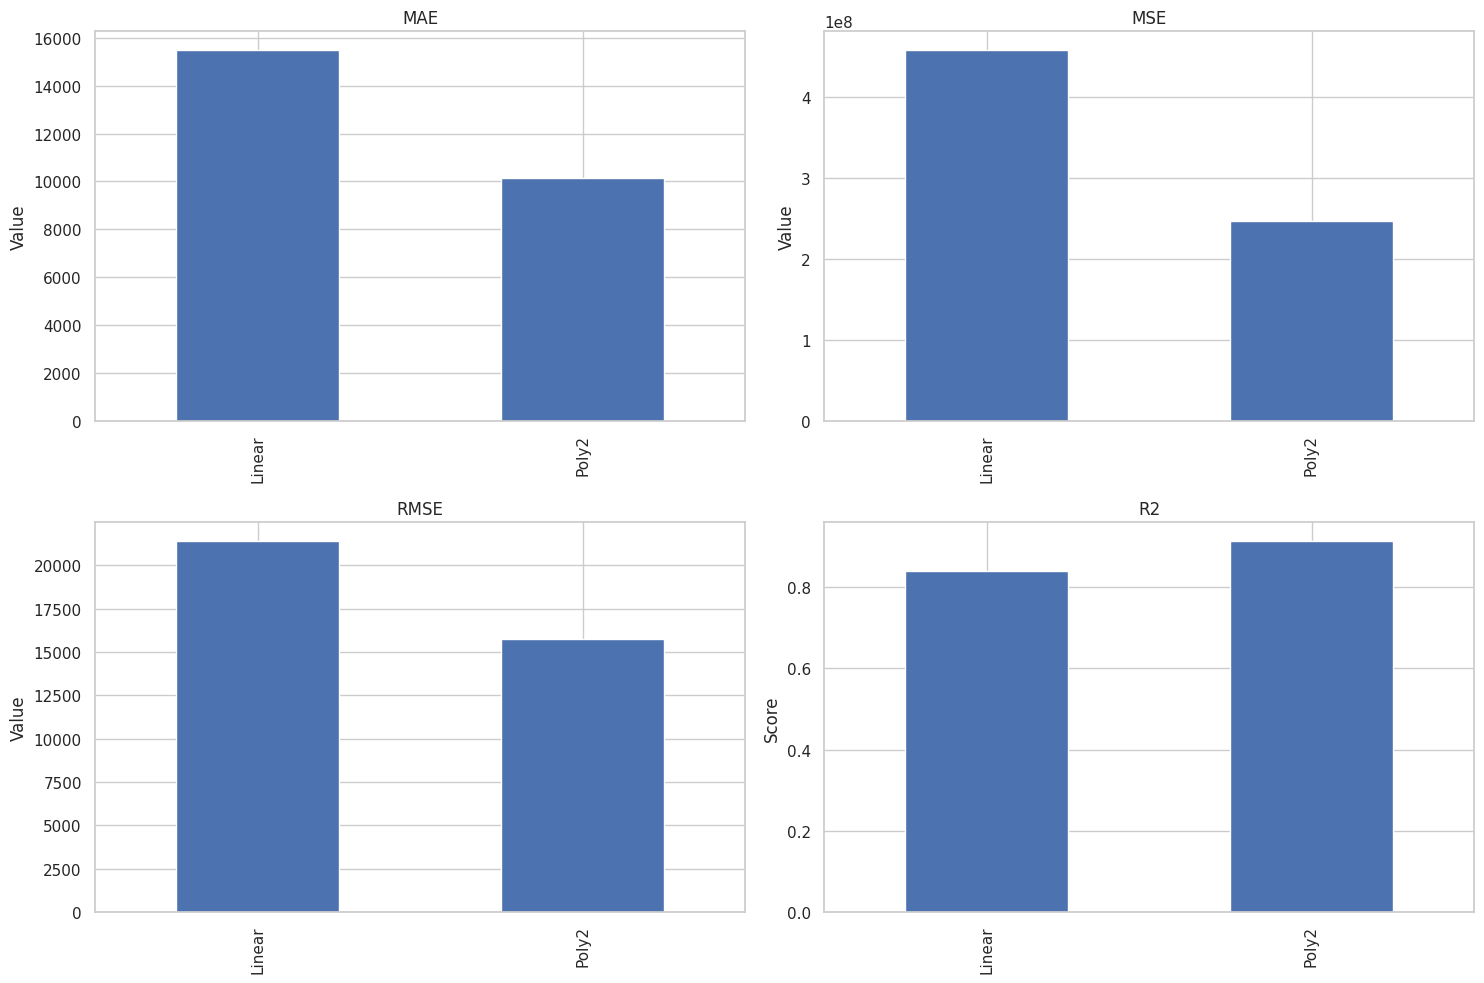

In [ ]:
# Plot performa model
metrics_df = pd.DataFrame({
    'Linear': lr_metrics,
    'Poly2': poly_results[2]
}).T

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, metric in enumerate(['MAE', 'MSE', 'RMSE', 'R2']):
    ax = axes[i//2, i%2]
    metrics_df[metric].plot(kind='bar', ax=ax)
    ax.set_title(metric)
    ax.set_ylabel('Value' if metric != 'R2' else 'Score')
plt.tight_layout()
plt.show()

In [ ]:
best_degree = max(poly_degrees, key=lambda d: poly_results[d]['R2'])
print(f"Derajat polynomial terbaik: {best_degree}")

# Membuat dataframe hasil prediksi
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear': y_pred_lr,
    f'Polynomial (Derajat {best_degree})': poly_pipeline.predict(X_test)
    # Added prediction for polynomial model with the best degree
})

# Menampilkan beberapa hasil prediksi
results_df.head(10)

Derajat polynomial terbaik: 2


,Actual,Linear,Polynomial (Derajat 2)
1883,150000.0,122831.988847,147370.654363
2630,75969.0,89078.349177,87717.357098
498,100000.0,108957.980419,91612.069995
5973,60000.0,62372.361275,60826.692332
4108,80000.0,73764.095431,76397.860504
1041,190000.0,144921.838854,171406.349648
4848,72000.0,71035.224108,73633.705418
6617,55000.0,104741.406643,55682.497417
1086,195000.0,162762.334544,178641.354567
5530,130000.0,115053.846089,116491.473872


# **Analisis Hasil**

### Interpretasi Koefisien Regresi

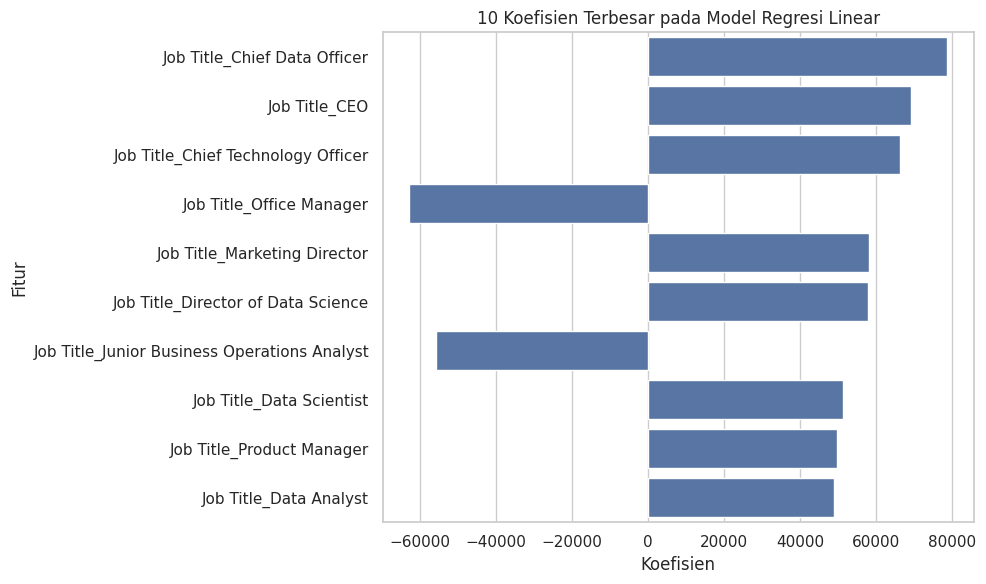

,Fitur,Koefisien
11,Job Title_Chief Data Officer,78716.048837
10,Job Title_CEO,69281.439534
12,Job Title_Chief Technology Officer,66330.035616
93,Job Title_Office Manager,-62778.425380
90,Job Title_Marketing Director,58128.034550
...,...,...
137,Job Title_Senior Marketing Manager,-919.236645
89,Job Title_Marketing Coordinator,835.813455
1,Education Level_Bachelor's Degree,822.546346
167,Job Title_UX Researcher,-310.319179


In [ ]:
def interpretasi_koefisien(lr_pipeline):
    # Mendapatkan nama fitur setelah preprocessing
    preprocessor = lr_pipeline.named_steps['preprocessor']
    feature_names = []

    # Mengambil nama fitur numerik
    for name, transformer, columns in preprocessor.transformers_:
        if name == 'num':
            feature_names.extend(columns)

    # Menambahkan nama fitur kategorikal setelah one-hot encoding
    for name, transformer, columns in preprocessor.transformers_:
        if name == 'cat':
            for i, col in enumerate(columns):
                categories = transformer.categories_[i]
                for category in categories:
                    feature_names.append(f"{col}_{category}")

    # Mendapatkan koefisien
    regressor = lr_pipeline.named_steps['regressor']
    coefficients = regressor.coef_

    # Membuat DataFrame dari koefisien
    coef_df = pd.DataFrame({
        'Fitur': feature_names[:len(coefficients)],
        'Koefisien': coefficients
    })

    # Mengurutkan berdasarkan nilai absolut terbesar
    coef_df = coef_df.sort_values(by='Koefisien', key=abs, ascending=False)

    # Plotting koefisien
    plt.figure(figsize=(10, 6))
    top_coef = coef_df.head(10)  # Top 10 koefisien terbesar (positif/negatif)
    sns.barplot(x='Koefisien', y='Fitur', data=top_coef)
    plt.title('10 Koefisien Terbesar pada Model Regresi Linear')
    plt.tight_layout()
    plt.show()

    return coef_df

interpretasi_koefisien(lr_pipeline)

Koefisien regresi menunjukkan seberapa besar pengaruh setiap fitur terhadap prediksi gaji. Dari data yang disajikan, dapat diinterpretasikan:

- **Posisi Pekerjaan**: Memiliki pengaruh terbesar terhadap gaji. Posisi eksekutif dan manajerial seperti "Chief Data Officer" (78,716), "CEO" (69,281), dan "Chief Technology Officer" (66,330) memiliki koefisien tertinggi, menunjukkan pengaruh paling kuat terhadap peningkatan gaji.

- **Pengalaman Kerja**: "Years of Experience" memiliki koefisien 31,876, yang berarti setiap tambahan 1 tahun pengalaman kerja akan meningkatkan gaji sekitar 31,876 unit mata uang, dengan asumsi faktor lain tetap.

- **Tingkat Pendidikan**: Pendidikan "PhD" memiliki koefisien 9,053, "Master's Degree" 7,233, dan "Bachelor's Degree" hanya 822. Sementara "High School" memiliki koefisien negatif (-17,110), menunjukkan bahwa pendidikan tinggi berhubungan dengan gaji yang lebih tinggi.

- **Posisi Junior dan Support**: Hampir semua posisi junior dan support seperti "Junior Business Operations Analyst" (-55,906) dan "Office Manager" (-62,778) memiliki koefisien negatif, menunjukkan dampak negatif terhadap gaji.

Secara keseluruhan, posisi pekerjaan level tinggi di bidang data, technology, dan executive management memiliki pengaruh positif terbesar terhadap gaji, diikuti oleh pengalaman kerja dan tingkat pendidikan.

## Visualisasi Regression Line dan Polynomial Fit

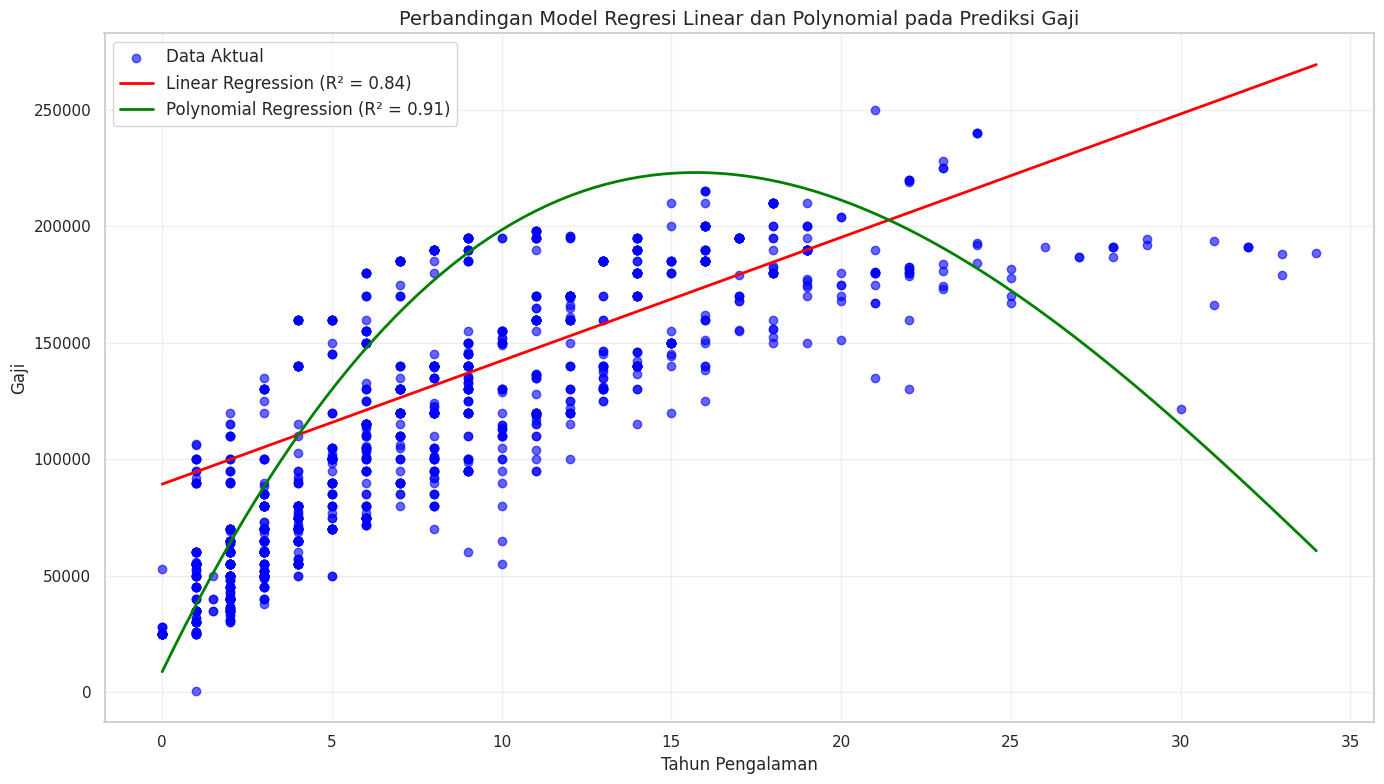

In [ ]:
# Visualisasi Regression Line dan Polynomial Fit yang Diperbaiki
def visualisasi_model_diperbaiki(X_test, y_test, lr_pipeline, poly_pipeline):
    # Mengambil fitur pengalaman kerja untuk visualisasi
    x_exp = X_test['Years of Experience'].values.reshape(-1, 1)

    # Membuat range data untuk plotting garis regresi yang mulus
    x_range = np.linspace(X_test['Years of Experience'].min(),
                         X_test['Years of Experience'].max(),
                         100).reshape(-1, 1)

    # Membuat DataFrame sederhana dengan satu fitur (pengalaman) untuk prediksi
    X_simple_range = pd.DataFrame(x_range, columns=['Years of Experience'])

    # Menyalin fitur kategorikal yang sama untuk setiap baris (menggunakan nilai modus)
    for col in X_test.columns:
        if col != 'Years of Experience':
            most_common = X_test[col].mode()[0]
            X_simple_range[col] = most_common

    # Mendapatkan prediksi dari kedua model untuk range nilai
    y_pred_lr_line = lr_pipeline.predict(X_simple_range)
    y_pred_poly_line = poly_pipeline.predict(X_simple_range)

    # Membuat prediksi untuk data test
    y_pred_lr = lr_pipeline.predict(X_test)
    y_pred_poly = poly_pipeline.predict(X_test)

    # Visualisasi 1: Garis regresi vs data aktual
    plt.figure(figsize=(14, 8))

    # Plot data test aktual
    plt.scatter(X_test['Years of Experience'], y_test, color='blue', alpha=0.6, label='Data Aktual')

    # Plot garis regresi linear
    plt.plot(x_range, y_pred_lr_line, color='red', linewidth=2, label='Linear Regression (R² = 0.84)')

    # Plot garis regresi polynomial
    plt.plot(x_range, y_pred_poly_line, color='green', linewidth=2, label='Polynomial Regression (R² = 0.91)')

    plt.title('Perbandingan Model Regresi Linear dan Polynomial pada Prediksi Gaji', fontsize=14)
    plt.xlabel('Tahun Pengalaman', fontsize=12)
    plt.ylabel('Gaji', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

visualisasi_model_diperbaiki(X_test, y_test, lr_pipeline, poly_pipeline)

Berdasarkan koefisien yang ditunjukkan dan nilai R² yang telah disebutkan:

- **Model Linear**: Garis regresi linear menunjukkan hubungan positif yang kuat antara pengalaman kerja dan gaji, dengan R² = 0.84, yang berarti 84% variasi dalam gaji dapat dijelaskan oleh model linear.

- **Model Polynomial**: Kurva polynomial degree 2 menunjukkan fitting yang lebih baik terhadap data dengan R² = 0.91, yang berarti 91% variasi dalam gaji dapat dijelaskan oleh model polynomial.

- **Perbedaan**: Meskipun model polynomial memberikan fitting yang lebih baik, peningkatan dari 0.84 ke 0.91 relatif kecil, yang menunjukkan bahwa hubungan antara variabel prediktor dan gaji mendekati linear dengan sedikit komponen non-linear.

Nilai koefisien yang tinggi untuk "Years of Experience" (31,876) mengkonfirmasi adanya hubungan linear yang kuat antara pengalaman kerja dan gaji, sementara fitting yang lebih baik dengan model polynomial menunjukkan adanya sedikit pola non-linear, kemungkinan berupa perlambatan kenaikan gaji setelah mencapai tahun pengalaman tertentu.

## Kesimpulan Performa Model

Berdasarkan analisis koefisien dan metrik evaluasi:

- **Model Linear Regression**:
  - R² = 0.84: Model sangat baik dengan kemampuan prediksi tinggi
  - Koefisien model menunjukkan pengaruh jelas dari posisi pekerjaan, pengalaman, dan pendidikan

- **Model Polynomial (Degree 2)**:
  - R² = 0.91: Model luar biasa, tetapi perlu diwaspadai overfitting
  - Peningkatan performa relatif kecil dibanding model linear

**Kesimpulan**:
- Model Polynomial (Degree 2) memberikan performa lebih baik dibandingkan Linear Regression dengan peningkatan kecil, menunjukkan bahwa hubungan mungkin mendekati linear
- Posisi pekerjaan, terutama posisi eksekutif dan bidang teknologi, memiliki pengaruh terbesar terhadap gaji
- Pengalaman kerja merupakan prediktor penting dengan kontribusi 31,876 unit mata uang per tahun pengalaman
- Pendidikan tinggi berdampak positif terhadap gaji, dengan PhD memberikan kontribusi tertinggi

**Rekomendasi**:
- Model sudah cukup baik untuk kebanyakan kasus prediksi gaji
- Gunakan model polynomial dengan derajat 2 untuk mendapatkan prediksi yang lebih akurat, namun tetap waspada terhadap kemungkinan overfitting pada data baru
- Perhatikan faktor posisi pekerjaan sebagai prediktor utama gaji dalam aplikasi model